In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", 90)
pd.set_option("display.max_rows", None)

In [2]:
df=pd.read_csv('used cars regression.csv')
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
df.drop(['New_Price','Unnamed: 0'],axis=1,inplace=True)

In [4]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [5]:
df['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [7]:
df['Owner_Type']=df['Owner_Type'].replace({'First':1, 'Second':2, 'Fourth & Above':4, 'Third':3})
df['Owner_Type'].unique()

array([1, 2, 4, 3], dtype=int64)

In [8]:
df['Transmission'].replace({'Manual':0, 'Automatic':1},inplace=True)
df['Transmission'].unique()

array([0, 1], dtype=int64)

In [9]:
df['Engine'].replace(np.nan,'0 CC',inplace=True)

In [10]:
arr=df['Engine'].str.split(expand=True).iloc[:,[0]]
arr=arr.astype(int)
df['Engine']=arr
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission           int64
Owner_Type             int64
Mileage               object
Engine                 int32
Power                 object
Seats                float64
Price                float64
dtype: object

In [11]:
df['Engine'].replace(0,np.nan,inplace=True)

In [12]:
df['Power'].replace('null bhp','0 bhp',inplace=True)
arr1=df['Power'].str.split(expand=True).iloc[:,[0]]
arr1=arr1.astype(float)
df['Power']=arr1
df['Power'].replace(0,np.nan,inplace=True)

In [13]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission           int64
Owner_Type             int64
Mileage               object
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

In [14]:
df['Brands']=df['Name'].str.split(expand=True).iloc[:,0].replace('Isuzu','ISUZU')

In [15]:
df['Brands'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'ISUZU', 'Force', 'Bentley', 'Lamborghini'],
      dtype=object)

In [16]:
df[df['Name'].str.startswith("Land")]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brands
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,1,1,12.7 kmpl,2179.0,187.70,5.0,27.00,Land
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,1,2,0.0 kmpl,2179.0,115.00,5.0,17.50,Land
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,1,1,12.7 kmpl,2179.0,187.70,5.0,55.76,Land
311,Land Rover Range Rover HSE Dynamic,Delhi,2017,44000,Diesel,1,1,12.7 kmpl,2179.0,187.70,5.0,44.00,Land
399,Land Rover Range Rover 2.2L Dynamic,Hyderabad,2012,56000,Diesel,1,1,12.7 kmpl,2179.0,187.70,5.0,30.00,Land
404,Land Rover Range Rover 2.2L Prestige,Coimbatore,2017,34990,Diesel,1,1,12.7 kmpl,2179.0,187.70,5.0,53.83,Land
410,Land Rover Range Rover 2.2L Pure,Coimbatore,2014,95649,Diesel,1,1,12.7 kmpl,2179.0,187.70,5.0,29.67,Land
480,Land Rover Range Rover Evoque 2.0 TD4 Pure,Delhi,2015,24000,Diesel,1,2,15.68 kmpl,1999.0,177.00,5.0,33.50,Land
521,Land Rover Range Rover HSE Dynamic,Coimbatore,2017,49275,Diesel,1,1,12.7 kmpl,2179.0,187.70,5.0,45.64,Land
701,Land Rover Freelander 2 SE,Chennai,2011,109000,Diesel,1,1,12.39 kmpl,2179.0,147.51,5.0,16.50,Land


In [17]:
df['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

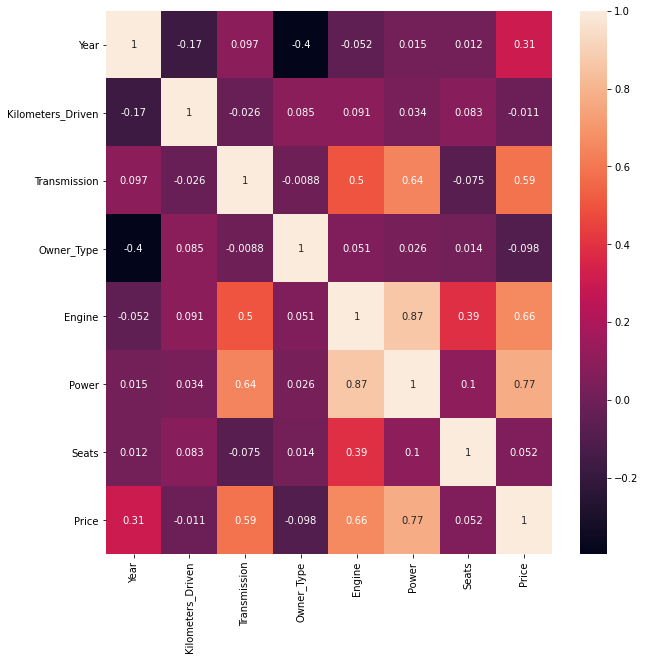

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [19]:
df.describe()

,Year,Kilometers_Driven,Transmission,Owner_Type,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6019.000000,6019.000000,5983.000000,5876.000000,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,0.285762,1.202858,1621.276450,113.253050,5.278735,9.479468
std,3.269742,9.126884e+04,0.451814,0.456356,601.355233,53.874957,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,1.000000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,3.400000e+04,0.000000,1.000000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,0.000000,1.000000,1493.000000,97.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,1.000000,1.000000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,1.000000,4.000000,5998.000000,560.000000,10.000000,160.000000


In [20]:
df[df["Year"]==2019].mean()

Year                  2019.000000
Kilometers_Driven    20019.647059
Transmission             0.450980
Owner_Type               1.000000
Engine                1728.862745
Power                  125.320686
Seats                    5.450980
Price                   19.464118
dtype: float64

## so according to the above data we can predict that this data was submited in 2020 

## in the following cell we are going to create a new feature that describe the usage of the car along years

In [21]:
arr=list()
for i in range(6019):
    arr.append((2020-df.iloc[i,2])/df.iloc[i,3])
df['km/year']=arr   

In [22]:
df.corr()

,Year,Kilometers_Driven,Transmission,Owner_Type,Engine,Power,Seats,Price,km/year
Year,1.000000,-0.173048,0.097059,-0.397152,-0.052197,0.014525,0.012333,0.305327,-0.054577
Kilometers_Driven,-0.173048,1.000000,-0.025663,0.085337,0.091068,0.033503,0.083113,-0.011493,-0.121483
Transmission,0.097059,-0.025663,1.000000,-0.008797,0.500381,0.643737,-0.075475,0.586025,0.006323
Owner_Type,-0.397152,0.085337,-0.008797,1.000000,0.050907,0.026088,0.014052,-0.097557,-0.010639
Engine,-0.052197,0.091068,0.500381,0.050907,1.000000,0.866185,0.393337,0.658354,-0.057974
Power,0.014525,0.033503,0.643737,0.026088,0.866185,1.000000,0.101562,0.772566,-0.016878
Seats,0.012333,0.083113,-0.075475,0.014052,0.393337,0.101562,1.000000,0.052225,-0.115701
Price,0.305327,-0.011493,0.586025,-0.097557,0.658354,0.772566,0.052225,1.000000,0.000750
km/year,-0.054577,-0.121483,0.006323,-0.010639,-0.057974,-0.016878,-0.115701,0.000750,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='count'>

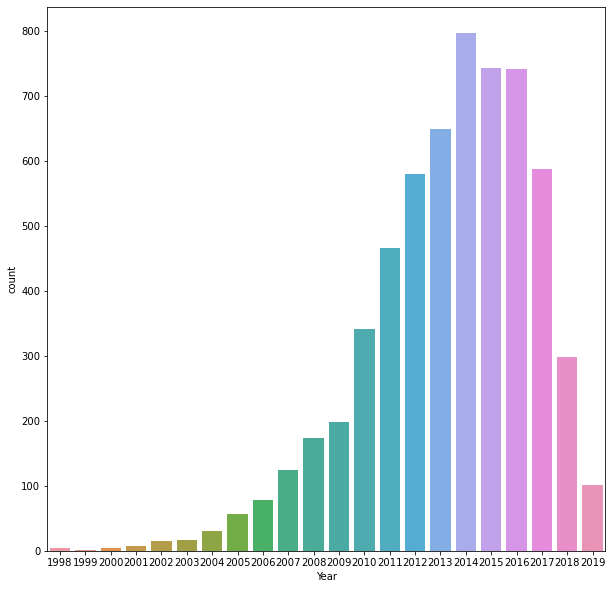

In [23]:
plt.figure(figsize=(10,10))
sns.countplot(df['Year'])

## we can conclude from the above plot:
### 1-most of the cars in the used cars market manifactured between 2012 and 2017 which means that they are hte most accepted
### 2-there was a high inclination of slope after 2009


1998
0    3
1    1
Name: Transmission, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


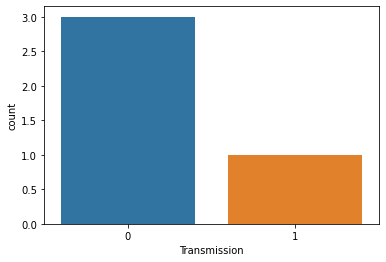

1999
0    2
Name: Transmission, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


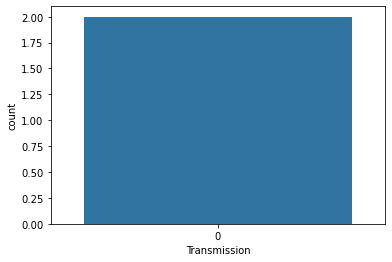

2000
0    4
Name: Transmission, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


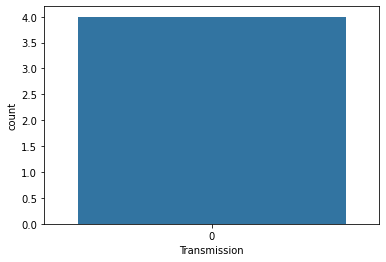

2001
0    8
Name: Transmission, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


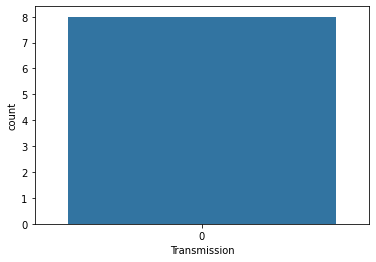

2002
0    15
Name: Transmission, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


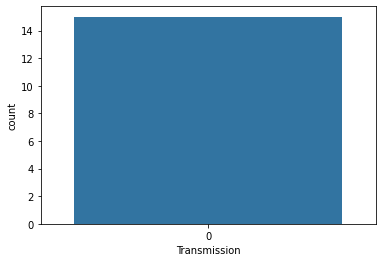

2003
0    15
1     2
Name: Transmission, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


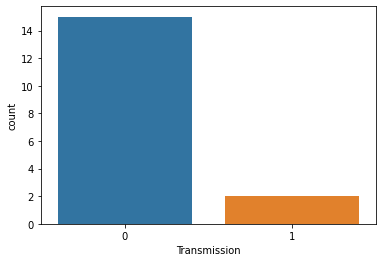

2004
0    25
1     6
Name: Transmission, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


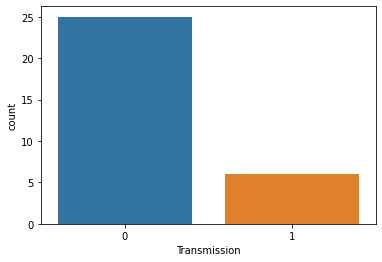

2005
0    48
1     9
Name: Transmission, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


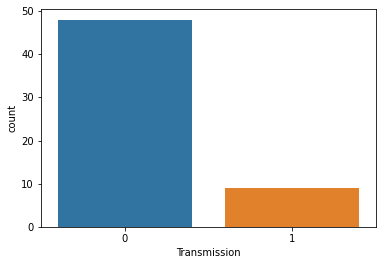

2006
0    67
1    11
Name: Transmission, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


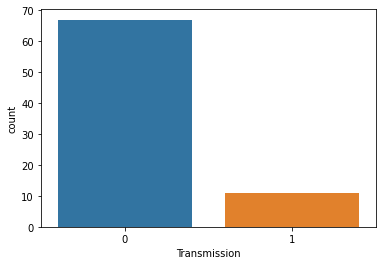

2007
0    105
1     20
Name: Transmission, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


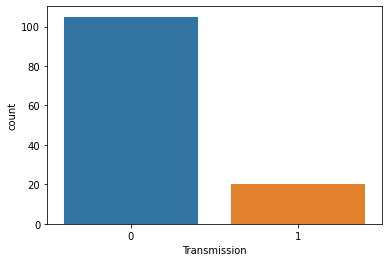

2008
0    132
1     42
Name: Transmission, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


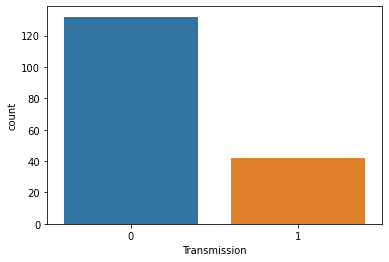

2009
0    131
1     67
Name: Transmission, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


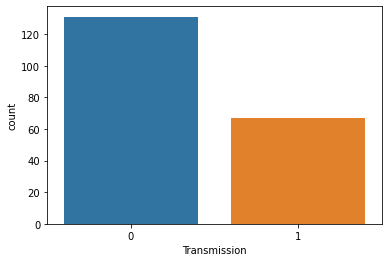

2010
0    265
1     77
Name: Transmission, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


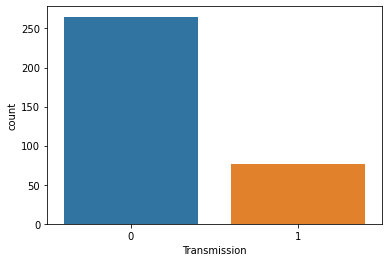

2011
0    334
1    132
Name: Transmission, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


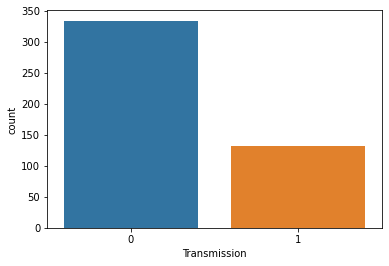

2012
0    433
1    147
Name: Transmission, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


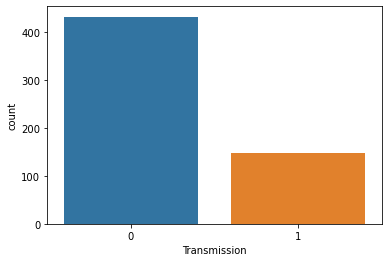

2013
0    469
1    180
Name: Transmission, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


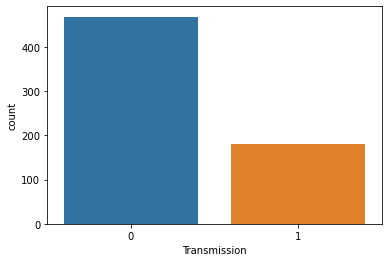

2014
0    572
1    225
Name: Transmission, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


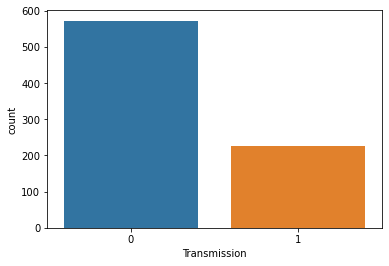

2015
0    523
1    221
Name: Transmission, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


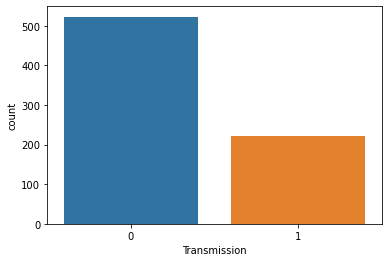

2016
0    512
1    229
Name: Transmission, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


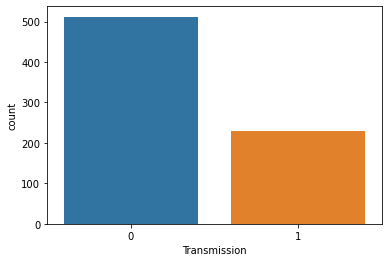

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2017
0    389
1    198
Name: Transmission, dtype: int64


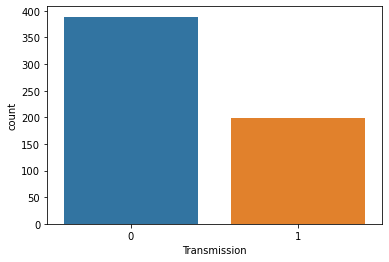

2018
0    191
1    107
Name: Transmission, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


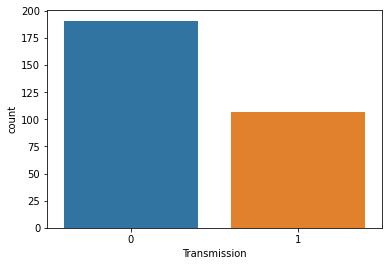

In [24]:
for i in range(1998,2019):
    print(i)
    print(df[df['Year']==i]['Transmission'].value_counts())
    plt.figure()
    sns.countplot(df[df['Year']==i]['Transmission'])
    plt.show()

### 3-most of people are trying to sell manual cars of model year 2007 and less because they are too tiring 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


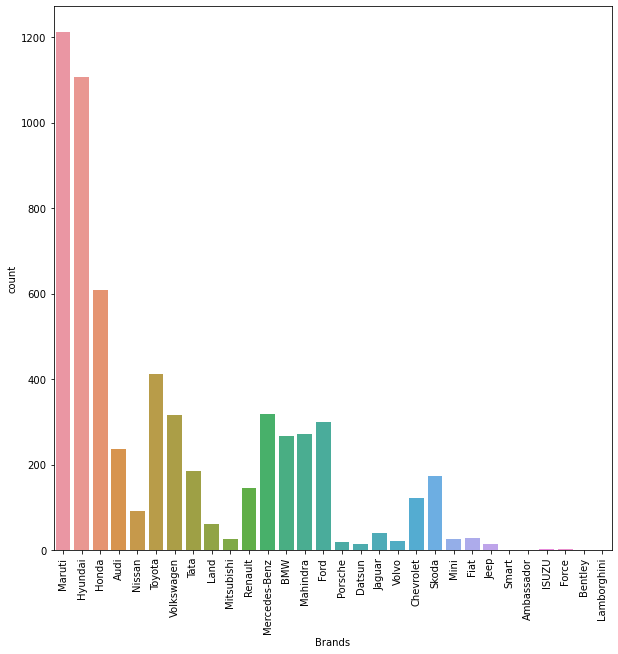

In [25]:
plt.figure(figsize=(10,10))
sns.countplot(df['Brands'])
plt.xticks(rotation=90)
plt.show()

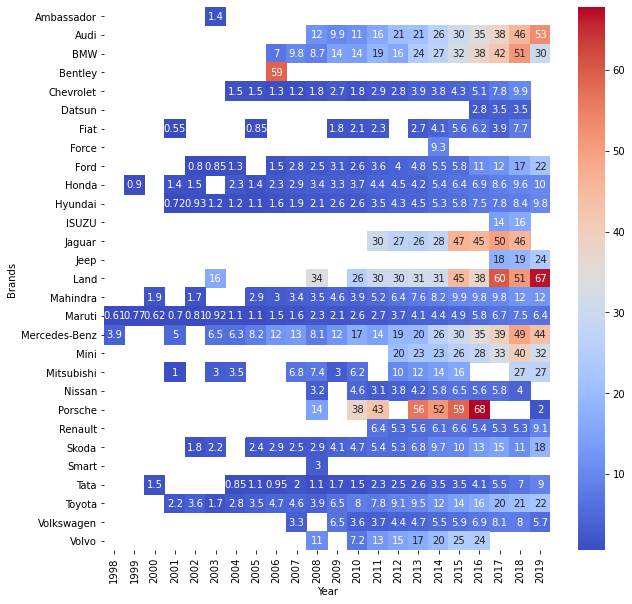

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(df.pivot_table(values='Price',index='Brands',columns=['Year']).drop('Lamborghini'),annot=True,cmap='coolwarm')
plt.show()

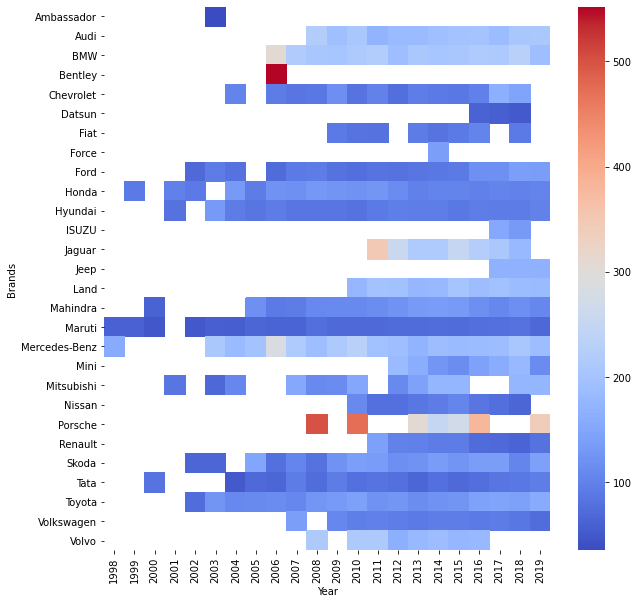

In [50]:
plt.figure(figsize=(10,10))
sns.heatmap(df.pivot_table(values='Power',index='Brands',columns=['Year']).drop('Lamborghini'),cmap='coolwarm')
plt.show()

## we have noticed from the above two heatmaps that therea re two brands that may have the same range of power but diffrence in prices due to their availability in the market (g.e :skoda and hyundai)

## Another thing we noticed that maruti has the biggest contribution in  the market because it is the car with medium features

## so we will try to make a new column that counts the cars in the market

In [54]:
df['Availability']=df['Brands'].replace({'Maruti'  :        1211
,'Hyundai'    :    1107
,'Honda'    :       608
,'Toyota'    :        411
,'Mercedes-Benz'   :  318
,'Volkswagen' :       315
,'Ford'      :      300
,'Mahindra'  :       272
,'BMW'   :          267
,'Audi'  :        236
,'Tata'   :        186
,'Skoda'   :          173
,'Renault'   :        145
,'Chevrolet'  :       121
,'Nissan' :            91
,'Land'   :            60
,'Jaguar'  :           40
,'Fiat'    :           28
,'Mitsubishi' :        27
,'Mini'      :         26
,'Volvo'      :        21
,'Porsche'    :        18
,'Jeep'     :          15
,'Datsun'  :           13
,'ISUZU'   :            3
,'Force'   :           3
,'Lamborghini':         1
,'Bentley' :            1
,'Smart'  :             1
,'Ambassador'   :       1
    
})

In [43]:
df.pivot_table(values='Price',index='Brands',columns=['Year']).index

Index(['Ambassador', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'Datsun', 'Fiat',
       'Force', 'Ford', 'Honda', 'Hyundai', 'ISUZU', 'Jaguar', 'Jeep',
       'Lamborghini', 'Land', 'Mahindra', 'Maruti', 'Mercedes-Benz', 'Mini',
       'Mitsubishi', 'Nissan', 'Porsche', 'Renault', 'Skoda', 'Smart', 'Tata',
       'Toyota', 'Volkswagen', 'Volvo'],
      dtype='object', name='Brands')

### we notice that cars like land rovers can walk for longtime and can still be sold

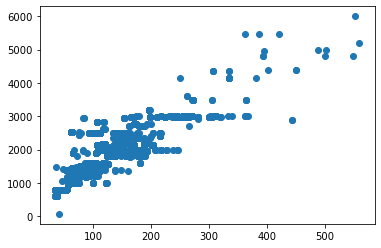

In [26]:
plt.figure()
plt.scatter(df['Power'],df['Engine'])
plt.show()

## we noticed that there is a good positive correlation
## we noticed also a weird bahaviour of graph that there is a big range of cars with 3000 CC

In [33]:
dfl=df[df['Engine']<=3100]
dfl=dfl[dfl['Engine']>=2900]
dfl.shape

(331, 14)

In [57]:
df.corr()

,Year,Kilometers_Driven,Transmission,Owner_Type,Engine,Power,Seats,Price,km/year,Availability
Year,1.000000,-0.173048,0.097059,-0.397152,-0.052197,0.014525,0.012333,0.305327,-0.054577,0.016288
Kilometers_Driven,-0.173048,1.000000,-0.025663,0.085337,0.091068,0.033503,0.083113,-0.011493,-0.121483,-0.050044
Transmission,0.097059,-0.025663,1.000000,-0.008797,0.500381,0.643737,-0.075475,0.586025,0.006323,-0.341311
Owner_Type,-0.397152,0.085337,-0.008797,1.000000,0.050907,0.026088,0.014052,-0.097557,-0.010639,-0.040567
Engine,-0.052197,0.091068,0.500381,0.050907,1.000000,0.866185,0.393337,0.658354,-0.057974,-0.528732
Power,0.014525,0.033503,0.643737,0.026088,0.866185,1.000000,0.101562,0.772566,-0.016878,-0.466131
Seats,0.012333,0.083113,-0.075475,0.014052,0.393337,0.101562,1.000000,0.052225,-0.115701,-0.153835
Price,0.305327,-0.011493,0.586025,-0.097557,0.658354,0.772566,0.052225,1.000000,0.000750,-0.367828
km/year,-0.054577,-0.121483,0.006323,-0.010639,-0.057974,-0.016878,-0.115701,0.000750,1.000000,0.010125
Availability,0.016288,-0.050044,-0.341311,-0.040567,-0.528732,-0.466131,-0.153835,-0.367828,0.010125,1.000000


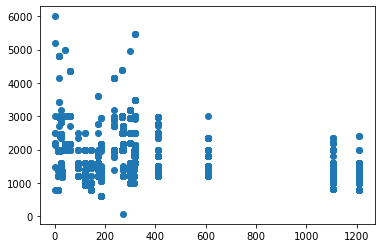

In [58]:
plt.scatter(df['Availability'],df['Engine'])

## we have noticed that there is a negative correlation between Engine feature and availability which makes sense because people does not tend to sell cars that can save up fuel money for them